# Compensation per employee

- The zip file contains 25 tables
- It contains many empty tables and duplicates
- I used the tables below
  - nama_10_lp_ulc_1_Data.csv: Compensation of employees per hour worked (Euro)
  - nama_10_lp_ulc_2_Data.csv: Compensation per employee (Euro)
  - nama_10_lp_ulc_10_Data.csv: Real labour productivity per person (Index, 2015=100)
- Compensation per hour worked and compensation per employee are highly correlated (0.99)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [2]:
data_path = 'data'

def atof(value):
    if value == ':':
        return None
    return locale.atof(value.replace(',', ''))

def nantonone(flag):
    if flag == 'nan':
        return None
    return flag

def truncate(geo, limit=20):
    return (geo[:limit] + '..') if len(geo) > limit else geo

geos_to_exclude = [
    'European Union - 27 countries (from 2020)',
    'European Union - 28 countries (2013-2020)',
    'European Union - 15 countries (1995-2004)',
    'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)',
    'Euro area - 19 countries  (from 2015)',
    'Euro area - 12 countries (2001-2006)']

country_name_dict = {
    'Germany (until 1990 former territory of the FRG)': 'Germany'
}
    
def normalize_country_name(name):
    if name in country_name_dict:
        return country_name_dict[name]
    else:
        return name

dfs = []
overview = []
for i in range(1,26):
    filename = f'nama_10_lp_ulc_{i}_Data.csv'
    df = pd.read_csv(f'{data_path}/{filename}')
    df = df[~df['GEO'].isin(geos_to_exclude)]
    df['TIME'] = df['TIME'].astype(int)
    df['GEO'] = df['GEO'].apply(normalize_country_name)
    df['Value'] = df['Value'].apply(atof)
    df['Flag and Footnotes'] = df['Flag and Footnotes'].apply(nantonone)
    dfs.append(df)
    
    na_item = ''.join(df['NA_ITEM'].unique())
    unit = ''.join(df['UNIT'].unique())
    value_null_rate = df['Value'].isna().mean().round(4) * 100
    flag_null_rate = df['Flag and Footnotes'].isna().mean().round(4) * 100
    overview.append({
        'filename': filename,
        'NA_ITEM': na_item,
        'UNIT': unit,
        'value_null_rate': value_null_rate,
        'flag_null_rate': flag_null_rate,
    })
overview_df = pd.DataFrame(overview)
display(overview_df)
display(overview_df['NA_ITEM'].unique().tolist())

,filename,NA_ITEM,UNIT,value null rate,flag_null_rate
0,nama_10_lp_ulc_1_Data.csv,Compensation of employees per hour worked,Euro,10.29,83.82
1,nama_10_lp_ulc_2_Data.csv,Compensation per employee,Euro,7.65,82.06
2,nama_10_lp_ulc_3_Data.csv,Nominal labour productivity per hour worked,Euro,100.00,100.00
3,nama_10_lp_ulc_4_Data.csv,Nominal labour productivity per person,Euro,100.00,100.00
4,nama_10_lp_ulc_5_Data.csv,Real labour productivity per person,Euro,100.00,100.00
5,nama_10_lp_ulc_6_Data.csv,Compensation of employees per hour worked,"Index, 2015=100",100.00,100.00
6,nama_10_lp_ulc_7_Data.csv,Compensation per employee,"Index, 2015=100",100.00,100.00
7,nama_10_lp_ulc_8_Data.csv,Nominal labour productivity per hour worked,"Index, 2015=100",100.00,100.00
8,nama_10_lp_ulc_9_Data.csv,Nominal labour productivity per person,"Index, 2015=100",100.00,100.00
9,nama_10_lp_ulc_10_Data.csv,Real labour productivity per person,"Index, 2015=100",7.35,79.71


['Compensation of employees per hour worked',
 'Compensation per employee',
 'Nominal labour productivity per hour worked',
 'Nominal labour productivity per person',
 'Real labour productivity per person']

In [3]:
compensation_per_hour_df = dfs[0]
compensation_per_hour_df.rename(columns={'Value': 'Compensation of employees per hour worked (Euro)'}, inplace=True)

compensation_per_employee_df = dfs[1]
compensation_per_employee_df.rename(columns={'Value': 'Compensation per employee (Euro)'}, inplace=True)

productivity_per_person_df = dfs[9]
productivity_per_person_df.rename(columns={'Value': 'Real labour productivity per person (Index, 2015=100)'}, inplace=True)

In [4]:
df = compensation_per_hour_df[['TIME', 'GEO', 'Compensation of employees per hour worked (Euro)']]
df_to_merge = compensation_per_employee_df[['TIME', 'GEO', 'Compensation per employee (Euro)']]

df = df.merge(df_to_merge, on=['TIME', 'GEO'])
df_to_merge = productivity_per_person_df[['TIME', 'GEO', 'Real labour productivity per person (Index, 2015=100)']]

productivity_df = df.merge(df_to_merge, on=['TIME', 'GEO'])
productivity_df.head()

,TIME,GEO,Compensation of employees per hour worked (Euro),Compensation per employee (Euro),"Real labour productivity per person (Index, 2015=100)"
0,2010,Belgium,34.3,49054.8,96.3
1,2011,Belgium,35.1,50593.5,96.7
2,2012,Belgium,36.2,52178.2,97.0
3,2013,Belgium,37.2,53452.5,97.7
4,2014,Belgium,37.6,53965.2,98.9


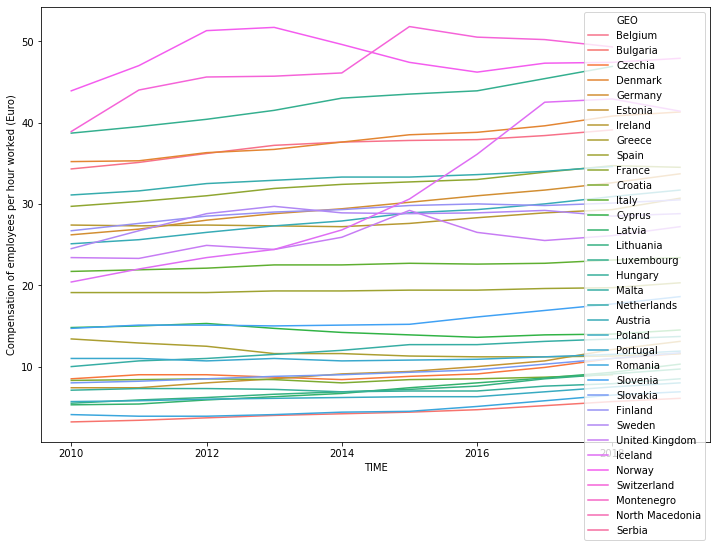

In [5]:
plt.figure(figsize=(12,8))
sns.lineplot(data=productivity_df, x='TIME', y='Compensation of employees per hour worked (Euro)', hue='GEO')
plt.show()

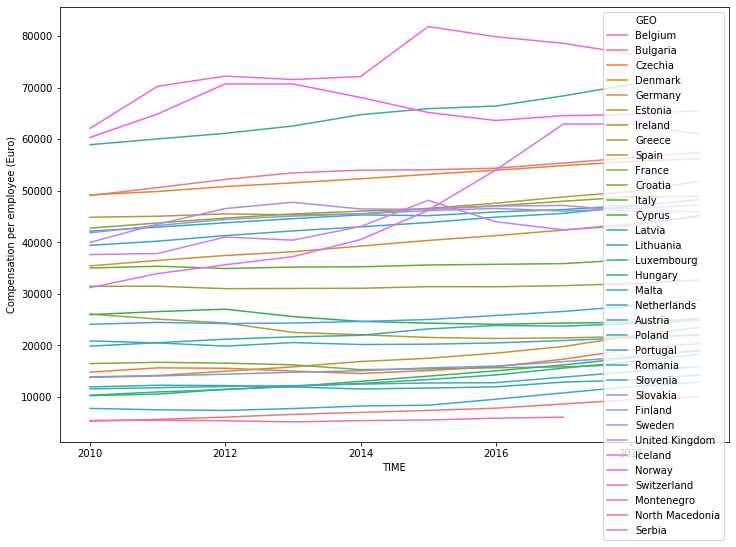

In [6]:
plt.figure(figsize=(12,8))
sns.lineplot(data=productivity_df, x='TIME', y='Compensation per employee (Euro)', hue='GEO')
plt.show()

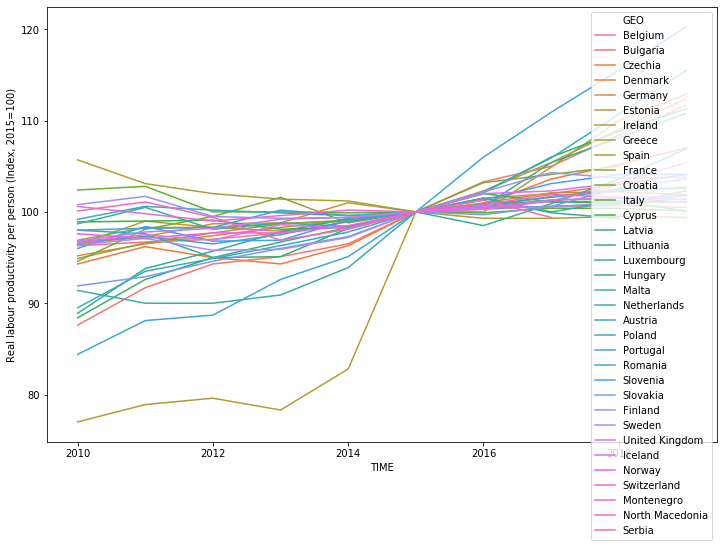

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(data=productivity_df, x='TIME', y='Real labour productivity per person (Index, 2015=100)', hue='GEO')
plt.show()

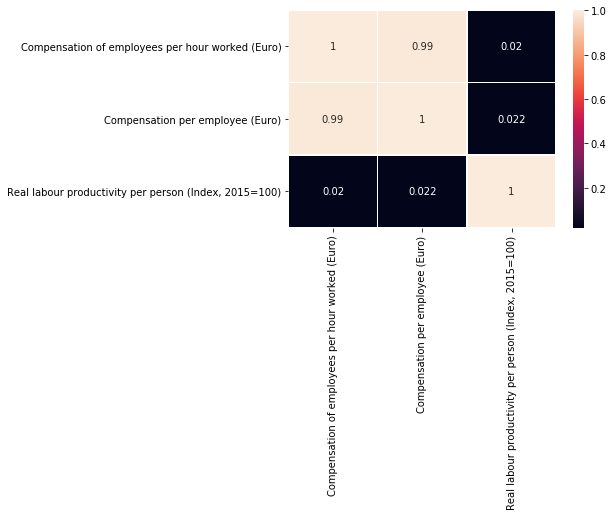

In [8]:
corr = productivity_df[[
    'Compensation of employees per hour worked (Euro)',
    'Compensation per employee (Euro)',
    'Real labour productivity per person (Index, 2015=100)']].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

In [9]:
column = 'Compensation of employees per hour worked (Euro)'
temp = productivity_df[~productivity_df[column].isnull()]
times = sorted(temp['TIME'].unique())
start, end = times[0], times[-1]
agg_first = temp.groupby(by=['GEO']).first().reset_index()
agg_last = temp.groupby(by=['GEO']).last().reset_index()
productivity_agg = agg_first.merge(agg_last, on=['GEO'], suffixes=('_start', '_last'))
productivity_agg['diff'] = productivity_agg.apply(lambda row: row[f'{column}_last'] - row[f'{column}_start'],axis=1)
productivity_agg['productivity_rank'] = productivity_agg['diff'].rank(ascending=False).astype(int)
sorted_agg = productivity_agg.sort_values(by='diff', ascending=False)
display(sorted_agg.head(5))
display(sorted_agg.tail(5))

,GEO,TIME_start,Compensation of employees per hour worked (Euro)_start,Compensation per employee (Euro)_start,"Real labour productivity per person (Index, 2015=100)_start",TIME_last,Compensation of employees per hour worked (Euro)_last,Compensation per employee (Euro)_last,"Real labour productivity per person (Index, 2015=100)_last",diff,productivity_rank
13,Iceland,2010,20.4,31185.9,96.7,2019,41.4,60998.9,105.4,21.0,1
29,Switzerland,2010,38.9,62068.8,100.6,2018,49.3,76494.7,103.0,10.4,2
18,Luxembourg,2010,38.7,58910.9,98.0,2018,46.9,70617.9,99.3,8.2,3
10,Germany,2010,26.2,35409.2,96.4,2019,33.7,44963.9,101.9,7.5,4
0,Austria,2010,25.1,39392.8,99.2,2019,31.7,48275.2,102.7,6.6,5


,GEO,TIME_start,Compensation of employees per hour worked (Euro)_start,Compensation per employee (Euro)_start,"Real labour productivity per person (Index, 2015=100)_start",TIME_last,Compensation of employees per hour worked (Euro)_last,Compensation per employee (Euro)_last,"Real labour productivity per person (Index, 2015=100)_last",diff,productivity_rank
27,Spain,2010,19.1,31449.5,94.9,2019,20.3,32680.2,101.1,1.2,27
23,Portugal,2010,11.0,20863.9,98.0,2019,11.9,22017.0,102.3,0.9,28
3,Croatia,2010,8.3,16462.0,94.6,2018,9.0,16279.9,105.0,0.7,29
4,Cyprus,2010,14.8,25954.5,98.9,2019,14.5,25148.8,101.1,-0.3,30
11,Greece,2010,13.4,26073.1,105.7,2019,11.6,21971.6,99.4,-1.8,31


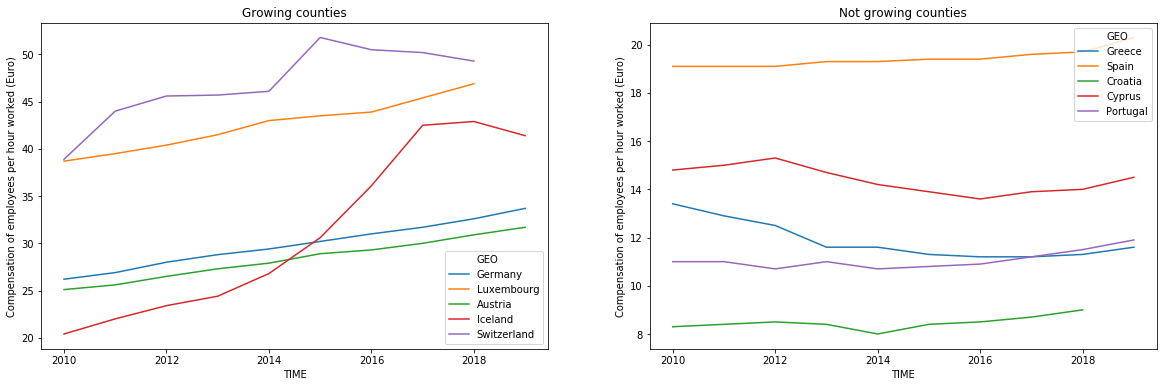

In [10]:
countries_sorted_by_productivity = productivity_agg.sort_values(by='diff', ascending=False)['GEO']

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.lineplot(data=df[df['GEO'].isin(countries_sorted_by_productivity[:5])], x='TIME', y=column, hue='GEO', ax=axes[0])
axes[0].set_title('Growing counties')
sns.lineplot(data=df[df['GEO'].isin(countries_sorted_by_productivity[-5:])], x='TIME', y=column, hue='GEO', ax=axes[1])
axes[1].set_title('Not growing counties')
plt.show()

In [11]:
column = 'Compensation of employees per hour worked (Euro)'
temp = productivity_df[~productivity_df[column].isnull()]
# productivity_agg = temp.groupby(by=['GEO']).last().reset_index()
productivity_agg = temp.groupby(['GEO'])[column].mean().reset_index()
productivity_agg['productivity_rank'] = productivity_agg[column].rank(ascending=False).astype(int)
sorted_agg = productivity_agg.sort_values(by=column, ascending=False)
display(sorted_agg.head(5))
display(sorted_agg.tail(5))

,GEO,Compensation of employees per hour worked (Euro),productivity_rank
21,Norway,47.970000,1
29,Switzerland,46.900000,2
18,Luxembourg,42.533333,3
6,Denmark,38.010000,4
1,Belgium,37.066667,5


,GEO,Compensation of employees per hour worked (Euro),productivity_rank
17,Lithuania,7.32,27
16,Latvia,7.32,27
22,Poland,6.48,29
24,Romania,4.92,30
2,Bulgaria,4.46,31


# Education

- **Hypothesis**: Educated people make more money
  - Education and productivity are correlated (0.34)

### Note

- Weak correlation: 0.1 - 0.3
- Moderate correlation: 0.3 - 0.5
- Strong correlation: 0.5 - 1.0

In [12]:
education_df = pd.read_csv(f'{data_path}/trng_lfs_02.tsv', delimiter='\t')
education_df.head()

,"unit,isced11,sex,age,geo\time",2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,"PC,ED0-2,F,Y18-24,AT",64.6,63.8,61.6,60.7,60.2 b,69.8,68.3,66.9,67.0,64.9,62.5,59.5,58.8 b,60.7,59.3 b
1,"PC,ED0-2,F,Y18-24,BE",72.2,64.5 b,60.0,54.8,58.2 b,55.6,53.8,53.8,55.8,54.6,52.0 b,52.6,53.2 b,49.2,62.5 b
2,"PC,ED0-2,F,Y18-24,BG",48.6,48.1,45.3,46.1,48.8 b,49.0,47.5,52.4,51.6,50.5,50.6,54.2,47.7 b,42.1,45.1
3,"PC,ED0-2,F,Y18-24,CH",86.1,83.6,79.7,80.6,78.8 b,80.8,81.3,81.9,77.0 b,74.2,77.4,80.0,75.7,73.2,74.6
4,"PC,ED0-2,F,Y18-24,CY",44.3,40.2,50.1 u,61.1,57.9 bu,51.9,45.0,37.9,31.2,28.9 bu,25.0 u,41.7,26.3 bu,20.7 u,28.6


In [13]:
from iso3166 import countries
import re

country_code_dict = {
    'EL': 'GR',
    'UK': 'GB'
}

def country_code_to_name(code):
    if code in country_code_dict:
        code = country_code_dict[code]
    try:
        return countries.get(code).name
    except KeyError:
        return None
    
country_name_dict = {
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
}
    
def normalize_country_name(name):
    if name in country_name_dict:
        return country_name_dict[name]
    else:
        return name

flag_dict = {
    ':': 'not available',
    'p': 'provisional',
    'b': 'break in time series',
    'd': 'definition differs',
    'c': 'conditional',
    'e': 'estimated',
}

def extract_flags(p_str):
    flag = None
    for char in flag_dict:
        if char in p_str:
            flag = flag_dict[char]
            break
    return flag

def preprocess(df):
    # Rename
    columns_to_rename = {c: c.rstrip() for c in df.columns if c.endswith(' ')}
    raw_base_column = [c for c in df.columns if c.endswith('\\time')][0] # e.g. 'unit,isced11,sex,age,geo\\time'
    base_column = raw_base_column.replace('\\time', '')
    columns_to_rename[raw_base_column] = base_column
    df.rename(columns=columns_to_rename, inplace=True)
    
    # Unpivot
    df = df.melt(id_vars=base_column, var_name='year', value_name='value')
    
    # Split
    columns_to_split = base_column.split(',')
    df[columns_to_split] = df[base_column].str.split(',', expand=True)
    df.drop(columns=[base_column], inplace=True)
    
    # Normalize country name
    df.rename(columns={'geo': 'GEO'}, inplace=True)
    df['GEO'] = df['GEO'].apply(country_code_to_name)
    df['GEO'] = df['GEO'].apply(normalize_country_name)
    
    # Extract flags
    df['flags'] = df['value'].apply(lambda p_str: extract_flags(p_str))
    df['value'] = df['value'].apply(lambda p_str: re.sub('[^\d\.]', '', p_str))
    df['value'] = df['value'].replace('', None, regex=True)
    
    # Convert data types
    df['year'] = df['year'].astype(int)
    df['value'] = df['value'].astype(float)

    return df
    
education_df = preprocess(education_df)
education_df.head()

,year,value,unit,isced11,sex,age,GEO,flags
0,2018,64.6,PC,ED0-2,F,Y18-24,Austria,None
1,2018,72.2,PC,ED0-2,F,Y18-24,Belgium,None
2,2018,48.6,PC,ED0-2,F,Y18-24,Bulgaria,None
3,2018,86.1,PC,ED0-2,F,Y18-24,Switzerland,None
4,2018,44.3,PC,ED0-2,F,Y18-24,Cyprus,None


In [14]:
temp = education_df[education_df['age'] == 'Y18-24']
education_agg = temp.groupby(['GEO','year'])['value'].mean().reset_index()
education_agg = education_agg.groupby(['GEO'])['value'].mean().reset_index()
education_agg['education_rank'] = education_agg['value'].rank(ascending=False).astype(int)
education_agg.head()

,GEO,value,education_rank
0,Austria,55.740000,13
1,Belgium,48.940476,26
2,Bulgaria,46.524444,28
3,Croatia,54.408889,18
4,Cyprus,39.391667,33


In [15]:
merged_df = productivity_agg[['GEO', 'productivity_rank']].merge(education_agg[['GEO', 'education_rank']], on='GEO')
merged_df.sort_values(by='productivity_rank')

,GEO,productivity_rank,education_rank
21,Norway,1,7
29,Switzerland,2,19
18,Luxembourg,3,3
6,Denmark,4,1
1,Belgium,5,26
20,Netherlands,6,4
9,France,7,15
13,Iceland,8,17
10,Germany,9,12
8,Finland,10,9


In [16]:
merged_df.corr()

,productivity_rank,education_rank
productivity_rank,1.000000,0.337873
education_rank,0.337873,1.000000


In [24]:
productivity_df

,TIME,GEO,Compensation of employees per hour worked (Euro),Compensation per employee (Euro),"Real labour productivity per person (Index, 2015=100)"
0,2010,Belgium,34.3,49054.8,96.3
1,2011,Belgium,35.1,50593.5,96.7
2,2012,Belgium,36.2,52178.2,97.0
3,2013,Belgium,37.2,53452.5,97.7
4,2014,Belgium,37.6,53965.2,98.9
...,...,...,...,...,...
335,2015,Serbia,NaN,NaN,NaN
336,2016,Serbia,NaN,NaN,NaN
337,2017,Serbia,NaN,NaN,NaN
338,2018,Serbia,NaN,NaN,NaN
